In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from datetime import datetime


mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

print("")
print("train.num = ", mnist.train.num_examples, 
      ", test.num = ", mnist.test.num_examples, 
      ", validation.num = ", mnist.validation.num_examples) 

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

#### shape 및 type(mnist) 확인

In [2]:
print("type(mnist) = ", type(mnist), 
      ", type(mnist.train.images) = ", type(mnist.train.images), 
      ", type(mnist.train.labels) = ", type(mnist.train.labels))

print("\ntrain image shape = ", np.shape(mnist.train.images))
print("train label shape = ", np.shape(mnist.train.labels))
print("test image shape = ", np.shape(mnist.test.images))
print("test label shape = ", np.shape(mnist.test.labels))

print("\ntrain image shape = ", mnist.train.images.shape)
print("test image shape = ", mnist.test.images.shape)
print("validation image shape = ", mnist.validation.images.shape)

type(mnist) =  <class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'> , type(mnist.train.images) =  <class 'numpy.ndarray'> , type(mnist.train.labels) =  <class 'numpy.ndarray'>

train image shape =  (55000, 784)
train label shape =  (55000, 10)
test image shape =  (10000, 784)
test label shape =  (10000, 10)

train image shape =  (55000, 784)
test image shape =  (10000, 784)
validation image shape =  (5000, 784)


#### train data 정규화 및 label 의 one-hot encoding 확인

In [3]:
# 정규화 확인
print("length of mnist.train.images = ", len(mnist.train.images))

for index in range(len(mnist.train.images)):
    
    min_val = np.min(mnist.train.images[index])
    max_val = np.max(mnist.train.images[index])
    
    if min_val < 0.0:
        print("min value is ", min_val, ", index = ", index)
        break
    
    if max_val > 1.0:
        print("max value is ", max_val, ", index = ", index)
        break
    
print("")
print(mnist.train.images[0])  # 정규화 확인을 위한 테스트 출력

length of mnist.train.images =  55000

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.   

In [4]:
# one-hot encoding 확인
print("length of mnist.train.images = ", len(mnist.train.labels))

for index in range(len(mnist.train.labels)):
    
    min_val = np.min(mnist.train.labels[index])
    max_val = np.max(mnist.train.labels[index])
    
    if min_val < 0.0:
        print("min value is ", min_val, ", index = ", index)
        break
    
    if max_val > 1.0:
        print("max value is ", max_val, ", index = ", index)
        break
    
print("")
print(mnist.train.labels[0])  # one-hot encoding 확인을 위한 테스트 출력

length of mnist.train.images =  55000

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


#### Hyper-Parameter 설정

In [0]:
# 입력노드, 은닉노드, 출력노드, 학습율, 반복횟수, 배치 개수 등 설정
learning_rate = 0.1  # 학습율
epochs = 50            # 반복횟수
batch_size = 100      # 한번에 입력으로 주어지는 MNIST 개수

input_nodes = 784     # 입력노드 개수
hidden_nodes = 100    # 은닉노드 개수
output_nodes = 10     # 출력노드 개수

#### 입력과 출력을 위한 플레이스홀더 정의

In [0]:
# 입력과 출력을 위한 플레이스홀더 정의
X = tf.placeholder(tf.float32, [None, input_nodes])  
T = tf.placeholder(tf.float32, [None, output_nodes])  

#### 가중치, 바이어스 정의

In [0]:
W2 = tf.Variable(tf.random_normal([input_nodes, hidden_nodes]))  # 은닉층 가중치 노드
b2 = tf.Variable(tf.random_normal([hidden_nodes]))               # 은닉층 바이어스 노드

W3 = tf.Variable(tf.random_normal([hidden_nodes, output_nodes])) # 출력층 가중치 노드
b3 = tf.Variable(tf.random_normal([output_nodes]))               # 출력층 바이어스 노드

In [0]:
Z2 = tf.matmul(X, W2) + b2    # 선형회귀 선형회귀 값 Z2
A2 = tf.nn.relu(Z2)           # 은닉층 출력 값 A2, sigmoid 대신 relu 사용

# 출력층 선형회귀  값 Z3, 즉 softmax 에 들어가는 입력 값
Z3 = logits = tf.matmul(A2, W3) + b3   

y = A3 = tf.nn.softmax(Z3)

In [0]:
loss = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2(logits=Z3, labels=T) )

optimizer = tf.train.GradientDescentOptimizer(learning_rate)

train = optimizer.minimize(loss)  

In [0]:
# batch_size X 10 데이터에 대해 argmax를 통해 행단위로 비교함
predicted_val = tf.equal( tf.argmax(A3, 1), tf.argmax(T, 1) )

# batch_size X 10 의 True, False 를 1 또는 0 으로 변환
accuracy = tf.reduce_mean(tf.cast(predicted_val, dtype=tf.float32))

# index list 출력
accuracy_index = tf.cast(predicted_val, dtype=tf.float32)

# 예측값 처리
predicted_list = tf.argmax(A3, 1)

In [19]:
# Type Check
print('type(predicted_val) = ', type(predicted_val),  ', type(accuracy) = ', type(accuracy))
print('type(accuracy_index) =', type(accuracy_index), ', type(predicted_list) = ', type(predicted_list))

type(predicted_val) =  <class 'tensorflow.python.framework.ops.Tensor'> , type(accuracy) =  <class 'tensorflow.python.framework.ops.Tensor'>
type(accuracy_index) = <class 'tensorflow.python.framework.ops.Tensor'> , type(predicted_list) =  <class 'tensorflow.python.framework.ops.Tensor'>


In [20]:
index_label_false_list_1 = []
index_label_false_list_2 = []

with  tf.Session()  as sess:
    
    sess.run(tf.global_variables_initializer())  # 변수 노드(tf.Variable) 초기화
        
    start_time = datetime.now()
    
    for i in range(epochs):    # 50 번 반복수행
        
        total_batch = int(mnist.train.num_examples / batch_size)  # 55,000 / 100

        for step in range(total_batch):
            
            batch_x_data, batch_t_data = mnist.train.next_batch(batch_size)
      
            loss_val, _ = sess.run([loss, train], feed_dict={X: batch_x_data, T: batch_t_data})    
        
            if step % 100 == 0:
                print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)             
    
    end_time = datetime.now()
    
    print("")
    print("Elapsed Time => ", end_time-start_time)
    print("")
    
    # Accuracy 확인
    test_x_data = mnist.test.images    # 10000 X 784
    test_t_data = mnist.test.labels    # 10000 X 10
    
    accuracy_val, predicted_list_val, index_label = sess.run([accuracy, predicted_list, accuracy_index], feed_dict={X: test_x_data, T: test_t_data})
    
    print("\nAccuracy = ", accuracy_val)
    print("type(accuracy_val) = ", type(accuracy_val), ', type(predicted_list_val) = ', type(predicted_list_val), ', type(index_label) = ', type(index_label))
    print("index_label.shape = ", index_label.shape)
    
    index_label_list = list(index_label)
    print("length of index_label_list = ", len(index_label_list))
    print("false label count = ", index_label_list.count([0]))
    
    
    # list type 으로 디버그
    temp_list = [] 
    
    for index in range(len(index_label_list)):
        
        if index_label_list[index] == 0:
            
            temp_list.append(index)
            temp_list.append(np.argmax(test_t_data[index]))  # one-hot encoding 이므로 argmax 로 정답 추출
            temp_list.append(predicted_list_val[index])
            
            index_label_false_list_1.append(temp_list)
            
            temp_list = []
            
    print("\nlength of index_label_false_list_1", len(index_label_false_list_1))
    
    # numpy type 으로 디버그
    temp_list = [] 
    
    for index in range(len(index_label)):
        
        if index_label[index] == 0:
            
            temp_list.append(index)
            temp_list.append(np.argmax(test_t_data[index]))  # one-hot encoding 이므로 argmax 로 정답 추출
            temp_list.append(predicted_list_val[index])
            
            index_label_false_list_2.append(temp_list)
            
            temp_list = []
            
    print("\nlength of index_label_false_list_2", len(index_label_false_list_2))

epochs =  0 , step =  0 , loss_val =  104.42905
epochs =  0 , step =  100 , loss_val =  5.4493346
epochs =  0 , step =  200 , loss_val =  2.5294538
epochs =  0 , step =  300 , loss_val =  1.6645944
epochs =  0 , step =  400 , loss_val =  2.466918
epochs =  0 , step =  500 , loss_val =  0.79886657
epochs =  1 , step =  0 , loss_val =  1.1780095
epochs =  1 , step =  100 , loss_val =  0.49604622
epochs =  1 , step =  200 , loss_val =  0.8166074
epochs =  1 , step =  300 , loss_val =  1.3740922
epochs =  1 , step =  400 , loss_val =  1.1018409
epochs =  1 , step =  500 , loss_val =  0.88690645
epochs =  2 , step =  0 , loss_val =  0.81971145
epochs =  2 , step =  100 , loss_val =  0.74649274
epochs =  2 , step =  200 , loss_val =  0.7310297
epochs =  2 , step =  300 , loss_val =  0.320104
epochs =  2 , step =  400 , loss_val =  0.44611374
epochs =  2 , step =  500 , loss_val =  0.6496271
epochs =  3 , step =  0 , loss_val =  0.46580973
epochs =  3 , step =  100 , loss_val =  0.3792227
epo

In [21]:
print(index_label_false_list_1)

[[33, 4, 6], [38, 2, 3], [109, 4, 9], [115, 4, 9], [121, 4, 6], [126, 0, 9], [149, 2, 6], [151, 9, 3], [158, 3, 2], [187, 5, 3], [193, 9, 8], [241, 9, 8], [244, 2, 7], [247, 4, 2], [259, 6, 5], [264, 9, 8], [274, 9, 3], [290, 8, 4], [300, 4, 6], [320, 9, 7], [321, 2, 7], [325, 4, 8], [340, 5, 3], [341, 6, 4], [358, 7, 3], [445, 6, 0], [448, 9, 8], [449, 3, 5], [464, 3, 7], [478, 5, 8], [479, 9, 8], [495, 8, 0], [502, 5, 3], [507, 3, 5], [543, 8, 2], [565, 4, 9], [582, 8, 2], [591, 8, 3], [610, 4, 2], [613, 2, 8], [629, 2, 6], [646, 2, 6], [659, 2, 8], [667, 7, 2], [689, 7, 9], [691, 8, 4], [717, 0, 2], [720, 5, 8], [726, 7, 9], [740, 4, 9], [791, 5, 9], [810, 7, 2], [866, 5, 4], [877, 8, 6], [881, 4, 9], [890, 3, 5], [900, 1, 3], [924, 2, 7], [926, 2, 6], [938, 3, 5], [950, 7, 2], [951, 5, 4], [965, 6, 0], [966, 9, 8], [969, 4, 9], [1012, 7, 9], [1014, 6, 0], [1017, 6, 4], [1032, 5, 6], [1039, 7, 1], [1045, 9, 8], [1092, 3, 5], [1096, 7, 9], [1107, 9, 8], [1112, 4, 0], [1119, 7, 2], [1

In [22]:
print(index_label_false_list_2)

[[33, 4, 6], [38, 2, 3], [109, 4, 9], [115, 4, 9], [121, 4, 6], [126, 0, 9], [149, 2, 6], [151, 9, 3], [158, 3, 2], [187, 5, 3], [193, 9, 8], [241, 9, 8], [244, 2, 7], [247, 4, 2], [259, 6, 5], [264, 9, 8], [274, 9, 3], [290, 8, 4], [300, 4, 6], [320, 9, 7], [321, 2, 7], [325, 4, 8], [340, 5, 3], [341, 6, 4], [358, 7, 3], [445, 6, 0], [448, 9, 8], [449, 3, 5], [464, 3, 7], [478, 5, 8], [479, 9, 8], [495, 8, 0], [502, 5, 3], [507, 3, 5], [543, 8, 2], [565, 4, 9], [582, 8, 2], [591, 8, 3], [610, 4, 2], [613, 2, 8], [629, 2, 6], [646, 2, 6], [659, 2, 8], [667, 7, 2], [689, 7, 9], [691, 8, 4], [717, 0, 2], [720, 5, 8], [726, 7, 9], [740, 4, 9], [791, 5, 9], [810, 7, 2], [866, 5, 4], [877, 8, 6], [881, 4, 9], [890, 3, 5], [900, 1, 3], [924, 2, 7], [926, 2, 6], [938, 3, 5], [950, 7, 2], [951, 5, 4], [965, 6, 0], [966, 9, 8], [969, 4, 9], [1012, 7, 9], [1014, 6, 0], [1017, 6, 4], [1032, 5, 6], [1039, 7, 1], [1045, 9, 8], [1092, 3, 5], [1096, 7, 9], [1107, 9, 8], [1112, 4, 0], [1119, 7, 2], [1

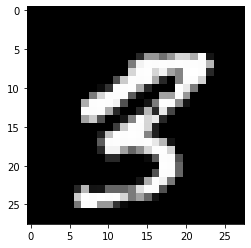

label =  3


In [23]:
# check false data
import matplotlib.pyplot as plt
%matplotlib inline

img = test_x_data[9944].reshape(28,28)  

plt.imshow(img, cmap='gray')
plt.show()

print("label = ", np.argmax(test_t_data[9944]))

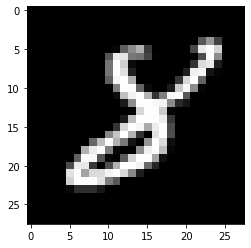

label =  9


In [24]:
# check false data
import matplotlib.pyplot as plt
%matplotlib inline

img = test_x_data[9926].reshape(28,28)  

plt.imshow(img, cmap='gray')
plt.show()

print("label = ", np.argmax(test_t_data[9918]))

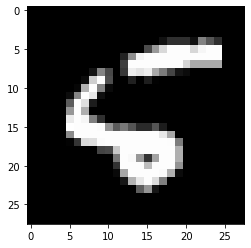

label =  5


In [25]:
# check false data
import matplotlib.pyplot as plt
%matplotlib inline

img = test_x_data[8].reshape(28,28)  

plt.imshow(img, cmap='gray')
plt.show()

print("label = ", np.argmax(test_t_data[8]))

colab 에서 drive mount

In [26]:
from google.colab import drive   # colab 사용시 mount 하기 위한 용도. local 에서는 불필요
drive.mount('/content/gdrive/')  # colab 사용시 mount 하기 위한 용도. local 에서는 불필요

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


#### 파일로 이미지 저장

10 image is saved now
20 image is saved now
30 image is saved now
40 image is saved now
50 image is saved now
60 image is saved now
70 image is saved now
80 image is saved now
90 image is saved now
100 image is saved now
110 image is saved now
120 image is saved now
130 image is saved now
140 image is saved now
150 image is saved now
160 image is saved now
170 image is saved now
180 image is saved now
190 image is saved now
200 image is saved now
210 image is saved now
220 image is saved now
230 image is saved now
240 image is saved now
250 image is saved now
260 image is saved now
270 image is saved now
280 image is saved now
290 image is saved now
300 image is saved now
310 image is saved now
320 image is saved now
330 image is saved now
340 image is saved now
350 image is saved now
360 image is saved now
370 image is saved now
380 image is saved now
390 image is saved now
400 image is saved now
410 image is saved now
420 image is saved now
430 image is saved now
440 image is saved n

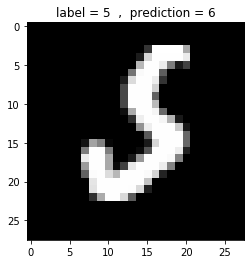

In [27]:
# check false data
import os
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

save_count = 0

# 현재 디렉토리 저장
curr_dir = os.getcwd()

# image 저장할 디렉토리 생성. 현재 시간으로 생성
now = datetime.now()
algorithm_name = 'NN1_100Hidden_GD_'
save_dir_name = algorithm_name + str(now.year) + '-' + str(now.month) + '-' + str(now.day) + '_' + str(now.hour) + str(now.minute) + str(now.second)

colab_default_dir = '/content/gdrive/My Drive/Colab Notebooks/'

os.chdir(colab_default_dir)
os.mkdir(save_dir_name)

# change dir
os.chdir(save_dir_name)

start_time = datetime.now()

for list_data in index_label_false_list_2:
    
    index_int = list_data[0]
    label_int = list_data[1]
    prediction_int = list_data[2]
        
    # 저장할 이미지를 인덱스를 이용하여 가져옴
    img = test_x_data[index_int].reshape(28,28)  
    plt.imshow(img, cmap='gray')
    
    # 정답 문자열
    label_str = str(label_int)
    
    # 예측값 문자열
    prediction_str = str(prediction_int)
    
    # 정답과 오답을 나타내는 문자열
    label_prediction_str = 'label = ' + label_str + '  ,  prediction = ' + prediction_str
    
    # 저장 파일 이름 생성, str(index_int).png
    save_image_name = str(index_int) + '.png'
    
    plt.title(label_prediction_str)
    plt.savefig(save_image_name)
    
    save_count += 1
    
    if save_count % 10 == 0:
        
        print(save_count, 'image is saved now')

    
end_time = datetime.now()

print('Elapsed save time => ', end_time - start_time)
print('Total ', save_count, " data is saved")

# 원래의 dir 로 복귀
os.chdir(curr_dir)

In [28]:
print(curr_dir)

/content
